<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>Автор материала: Артём Асмоловский (@Asmolovskij)

Приветствую! Перед вами решение задачи по определению дефолта у ипотечных заёмщиков США, содержащей более 5950 наблюдений. Безусловно, такая задача интересна и сама по себе. Обучив модель, можно предсказывать дальнейшее развитие событий относительно каждого конкретно взятого заёмщика. Однако, скорее всего, подобные данные не останются лишь в стенах банков, а используются различными организациями, имеющими дела с социумом. Вполне вероятно, что по данному набору данных можно попытаться извлечь некий социальный портрет каждого объекта, а затем пытаться кластеризовать их, преследуя уже совсем другие цели. например, предпочтения относительно дорогих покупок, если задачу решает некий ритейлер, либо добавочный коэффициент страхования, если заинтересованы страховщики. Забавная ситуация произошла в офисе одного из амеркианских магазинов Target, предсказав у одной из своих посетительниц беременность, отнеся её к кластеру точно беременных клиенток на основе их поведения. 

Однако я всё же буду решать задачу детектирования наступления дефолта у заёмщика, либо его отсутствия. Анализируемый датасет имеет следующие переменные. Итак, предикторы:

LOAN - сумма запроса кредита

MORTDUE - текущая сумма ипотеки

VALUE - стоимость текущей недвижимости

REASON: DebtCon - погашение задолженности, HomeImp - улучшение жилищных условий

JOB - род занятости

YOJ - количество лет на текщей работе

DEROG - количество негативных пометок на кредитной истории

DELINQ - количество просроченных кредитных погашений

CLAGE - количество в месяцах самой старой кредитной истории

NINQ - количество последних кредитных запросов

CLNO - количество кредитов

DEBTINC - отношение долгов к доходам

А предсказывать мы будем дефолт

BAD: 1 - не погасит, 0 - погасит

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Подгрузим данные
df = pd.read_csv('../../data/hmeq.csv')
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [5]:
#Посмотрим на общую характеристику данных
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Как видно, в данных имеется немало пропусков. и если такие переменные как VALUE или CLAGE имеют относительное небольшое число пробелов, которые вполне безболезненно можно заменить на средние или медианные значения по столбцу, то с переменной DEBTINC дела обстоят несоклько сложнее в первую очередь из-за большого количества пропусков (порядка 20%). Однако взглянув на описательную таблицу выше, можно заметить, что среднее практически совпадает с медианой. Что ж, в таком случае так же будем использовать cреднее или медианное для восполнения пробелов.

In [7]:
#Заполним пропуски для того, чтобы приступить к удобному визуальному анализу.

#В большинстве случаев будем порльзоваться медианным значением
df[['MORTDUE']] = df[['MORTDUE']].fillna(65000)
df[['VALUE']] = df[['VALUE']].fillna(89200)
df[['YOJ']] = df[['YOJ']].fillna(7)
df[['MORTDUE']] = df[['MORTDUE']].fillna(65000)
df[['DEROG']] = df[['DEROG']].fillna(0)
df[['DEROG']] = df[['DEROG']].fillna(0)
df[['DELINQ']] = df[['DELINQ']].fillna(0)
df[['CLAGE']] = df[['CLAGE']].fillna(179)
df[['NINQ']] = df[['NINQ']].fillna(0)
df[['CLNO']] = df[['CLNO']].fillna(0)
df[['DEBTINC']] = df[['DEBTINC']].fillna(0)

In [8]:
#Бинаризуем переменную Reason
df['REASON'] = df['REASON'].map({'DebtCon' : 0, 'HomeImp' : 1})

In [9]:
df['REASON'].value_counts()
#Как видим, больше половины объектов относятся к классу 0, поэтому заполним пропуски так же на 0

0.0    3928
1.0    1780
Name: REASON, dtype: int64

In [10]:
df['REASON'] = df['REASON'].fillna(0)

In [11]:
#Категоризуем переменную JOB
encoder = LabelEncoder().fit_transform(df["JOB"].astype(str))
df[["JOB"]] = encoder

Посомтрим на анализируемый датасет теперь и посмотрим, удалось ли нам полностью подготовить данные для дальнейшего анализа.

In [12]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,1.0,2,10.5,0.0,0.0,94.366667,1.0,9.0,0.000000
1,1,1300,70053.0,68400.0,1.0,2,7.0,0.0,2.0,121.833333,0.0,14.0,0.000000
2,1,1500,13500.0,16700.0,1.0,2,4.0,0.0,0.0,149.466667,1.0,10.0,0.000000
3,1,1500,65000.0,89200.0,0.0,6,7.0,0.0,0.0,179.000000,0.0,0.0,0.000000
4,0,1700,97800.0,112000.0,1.0,1,3.0,0.0,0.0,93.333333,0.0,14.0,0.000000
5,1,1700,30548.0,40320.0,1.0,2,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,1.0,2,5.0,3.0,2.0,77.100000,1.0,17.0,0.000000
7,1,1800,28502.0,43034.0,1.0,2,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,1.0,2,3.0,0.0,2.0,216.933333,1.0,12.0,0.000000
9,1,2000,65000.0,62250.0,1.0,4,16.0,0.0,0.0,115.800000,0.0,13.0,0.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5960 non-null float64
VALUE      5960 non-null float64
REASON     5960 non-null float64
JOB        5960 non-null int64
YOJ        5960 non-null float64
DEROG      5960 non-null float64
DELINQ     5960 non-null float64
CLAGE      5960 non-null float64
NINQ       5960 non-null float64
CLNO       5960 non-null float64
DEBTINC    5960 non-null float64
dtypes: float64(10), int64(3)
memory usage: 605.4 KB


Пропусков действительно нет, приступим к графическому анализу.

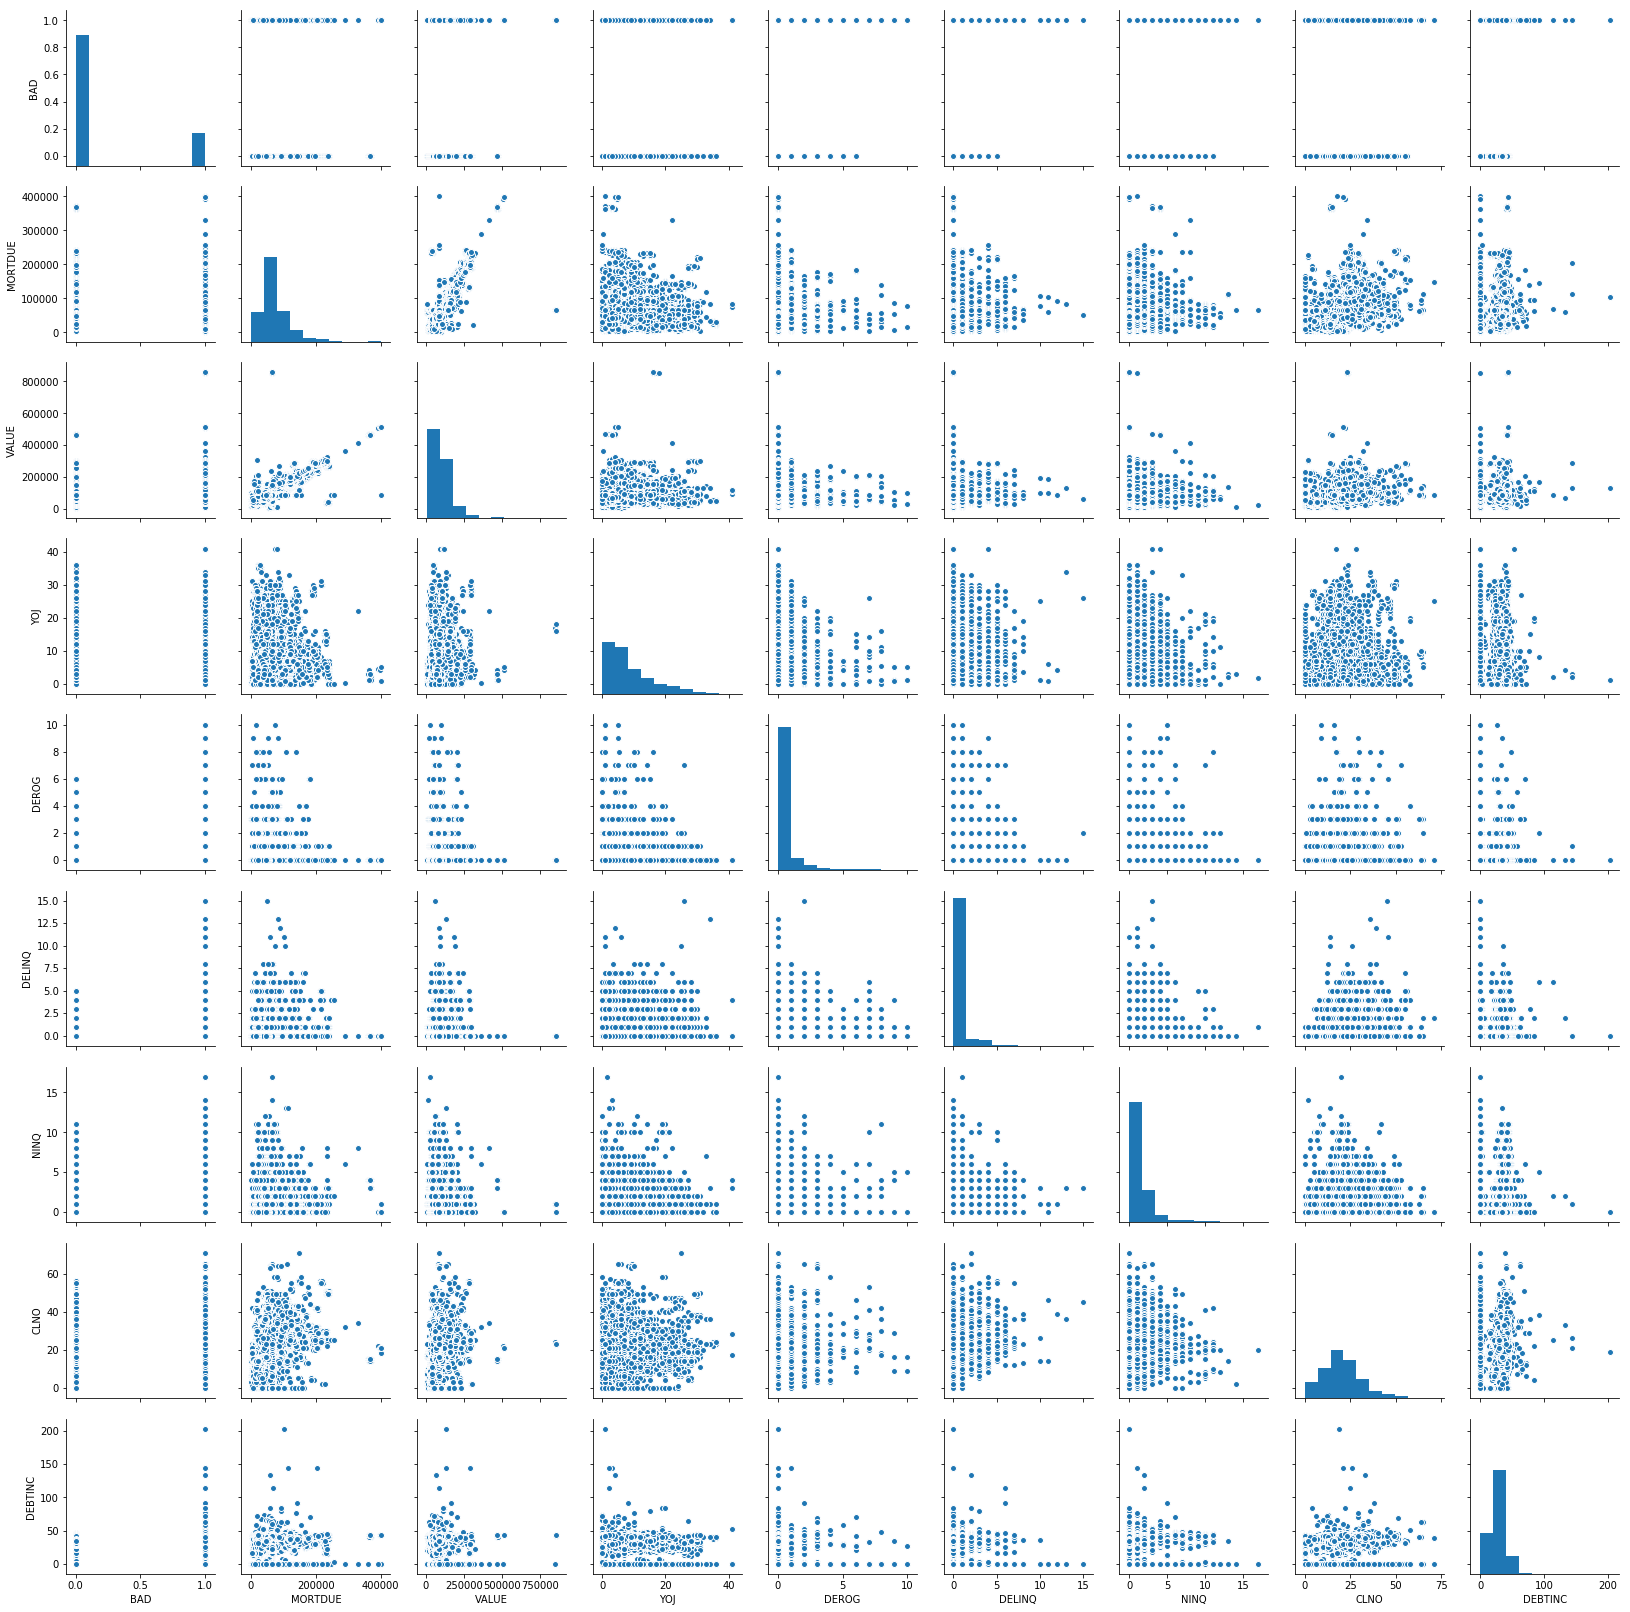

In [14]:
sns.pairplot(df[['BAD', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'NINQ', 'CLNO', 'DEBTINC']])

Каких-то явных закономерностей, помиомо того, что с ростом стоимости приобритаемого жилья растёт и стоимость ипотеки, нет. Стоит отметить почти идентичную зависимость у количества негативных пометок на кредитной истории и количества просроченных платежей относительно суммы займа, причём сумма займа в общей массе не превышает 0,25 квартиля, что свидетельствует об относительно небольших займах.

Интересно, а есть ли какие-нибудь профессии, среди которых присутствует наибольшее количество злостных неплательщиков, либо кредитных потребителей?

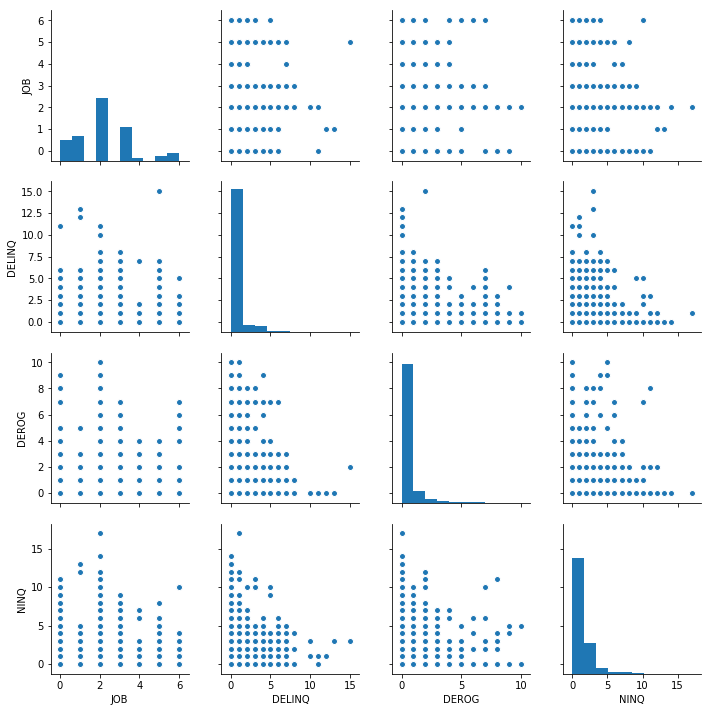

In [15]:
sns.pairplot(df[['JOB', "DELINQ", "DEROG", 'NINQ']])

Нет, каких-то явных суждений на этот счёт сделать нельзя. На всякий случай дополнительно отрисуем корреляционную матрицу.

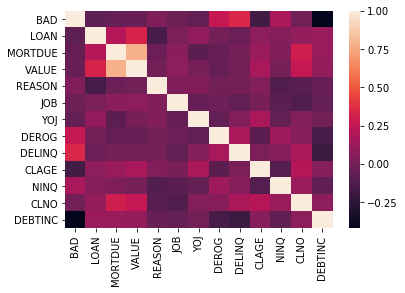

In [16]:
sns.heatmap(df.corr())

А тут уже вырисовывется более интересная картинка. Предположение о наибольшей зависимости между стоимостью жилья и ипотеки выполняется. Но по началу я даже не обратил внимания, что между суммой ипотеки и заявкой на кредит так же существует зависимость. Более того, между длиной кредитной истории и вероятностью наступления дефолта существует заметная связь, но с отрицательным знаком. И сильная отрицательная (если даже не отрицательная функциональная) между отношением долгов к доходам и вероятностью дефолта.

Предварительно сделаем следующий вывод: С увеличением кредитных просрочек и негативнх пометках на кредитной истории, вероятность дефолта увеличивается. Однако, чем дольше заёмщик берёт кредиты, и чем ниже отношение долгов к доходам, тем менее вероятность наступления дефолта.

Для того, чтобы выбрать метрику, на основании которой мы будем строить модели, посмотрим на целевой признак.

(array([4771.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1189.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

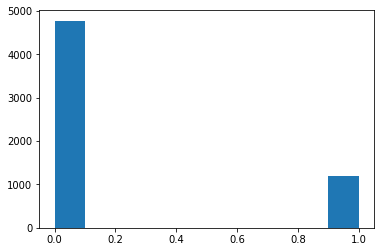

In [17]:
plt.hist(df['BAD'])

Видим явную несбалансировать классов, поэтому о простом accuracy_score можно забыть. В данном случе стоит подумать о бизнес-составляющей нашей задачи. Что важнее: отклассифицировать нехороших плательщиков, пожертвовав хорошими? Или найти как можно больше нехороших неплательщиков? Что ж, будем рисовать roc auc, чтобы оценивать модель в целом.

Поробуем 4 агоритма: логистическкую регрессию, метод к-ближайших, а так же случайный лес и градиентный бустинг (куда же без них).

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split,\
validation_curve, learning_curve

И займёмся финальной подготовкой данных: применим стандартизацию (чтобы избежать сильного влияния каких-то отдельных предикторов для линейки), извлечём целевой признак, а так же поделим выборку на тренировочную, валидационную и тестовую.

In [19]:
y = df[['BAD']]
X = df.drop('BAD', axis = 1)

In [20]:
#Создадим дамми-переменные для JOB
dummies_job = pd.get_dummies(df['JOB'], prefix = 'JOB')
X = pd.concat([X, dummies_job], axis = 1)
X = X.drop('JOB', axis = 1)

Извлечём из анализируемого датасета отложенную часть выборки, а для тренировочной извлечём ещё и валидационную.

In [21]:
idx_split = X.shape[0] * 0.8

In [22]:
X_train = X.iloc[:int(idx_split), :]
y_train = y.iloc[:int(idx_split), :]
X_test = X.iloc[int(idx_split) : , :]
y_test = y.iloc[int(idx_split) :, :]

In [23]:
X_train_part, X_train_valid, y_train_part, y_train_valid = train_test_split(X_train, y_train, test_size = 0.3, shuffle = True)

Оценим работу алгоритмов, настраивая гиперпараметры по сетке. Так же необходимо стандартизировать все не бинарные признаки. Чтобы провести стандартизацию корректно, при кросс-валидации необходимо обучать StandardScaler на каждом фолде.

In [24]:
#Приступаем к построениею моделей
#Поскольку у нас есть и категориальные, и непрерывные признаки, то, скорее всего, деревья будут лучше справляться

cv = StratifiedKFold(random_state=17, n_splits=5)

log_params = {'log__C' : [0.01, 0.05, 0.1, 0.25, 0.5, 1], 'log__random_state' : [17]}  
pipeline = Pipeline([('scaler', StandardScaler()), ('log', LogisticRegression())])
grid = GridSearchCV(pipeline, log_params, cv = cv)
grid.fit(X_train_part, y_train_part)
print('log best result: %s' % grid.best_score_)
print('log best params: %s' % grid.best_params_)

log best result: 0.8642493257416841
log best params: {'log__C': 0.01, 'log__random_state': 17}


In [25]:
knn_params = {'knn__n_neighbors' : range(1, 20)}  
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
grid = GridSearchCV(pipeline, knn_params, cv = cv)
grid.fit(X_train_part, y_train_part)
print('knn best result: %s' % grid.best_score_)
print('knn best params: %s' % grid.best_params_)

knn best result: 0.8888222954749775
knn best params: {'knn__n_neighbors': 1}


In [26]:
rf_params = {'rf__n_estimators' : [100, 250, 500, 750, 1000], 'rf__max_depth' : [1, 2, 3, 4, 5, 6, 7], 'rf__random_state' : [17]}  
pipeline = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())])
grid = GridSearchCV(pipeline, rf_params, cv = cv)
grid.fit(X_train_part, y_train_part)
print('rf best result: %s' % grid.best_score_)
print('rf best params: %s' % grid.best_params_)

rf best result: 0.8891219658375786
rf best params: {'rf__max_depth': 7, 'rf__n_estimators': 1000, 'rf__random_state': 17}


In [27]:
xgb_params = {'xgb__max_depth' : [1,2,3,4,5, 6, 7], 'xgb__n_estimators':[100, 250, 500, 750, 1000], 'xgb__random_state': [17]}  
pipeline = Pipeline([('scaler', StandardScaler()), ('xgb', XGBClassifier())])
grid = GridSearchCV(pipeline, xgb_params, cv = cv)
grid.fit(X_train_part, y_train_part)
print('xgb best result: %s' % grid.best_score_)
print('xgb best params: %s' % grid.best_params_)

xgb best result: 0.9145939466586754
xgb best params: {'xgb__max_depth': 4, 'xgb__n_estimators': 750, 'xgb__random_state': 17}


На текущий момент видно, что градиентный бустинг (с настройкой только глубины и количества деревьев) отрабатывает лучше остальных моделей. При этом можно замтить, что и случайный лес очень неплохо старается с настройкой тех же гиперпараметров, причём не факт, что их оптимальные значения были найдены. Однако для экономии вычислительных ресурсов остановимся на xgb.

Обучим данную модель на всей X_train и подсчитаем roc auc. Полученное значение будем считать бейзлайном для дальнейшего улучшения моделей.

In [28]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, n_jobs=-1, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xgb.fit(X_train_scaled, y_train)
print("Результат выбранной модели: %s" % roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:,1]))

Результат выбранной модели: 0.9040049218067795


Итак, с моделью мы определились. Самое время подумать о feature engineering. Воспользуемся здравым смыслом и посмотрим, как отличаются наиболее интересные переменные, вроде суммы займа, количества кредитов и прочих у способных к выплате и неспособных. (Предположение о наличии неплательщиков среди определённой профессии мы отклонили ранее).

In [29]:
np.mean(df[df['BAD'] == 1]['LOAN']), np.mean(df[df['BAD'] == 0]['LOAN'])
#Величина кредитного запроса у неплательщиков ниже почти на 2000 долларов

(16922.11942809083, 19028.107315028297)

In [30]:
np.mean(df[df['BAD'] == 1]['MORTDUE']), np.mean(df[df['BAD'] == 0]['MORTDUE'])
#Так же ниже стоимость ипотеки

(69062.80115222877, 73980.44364493816)

In [31]:
np.mean(df[df['BAD'] == 1]['VALUE']), np.mean(df[df['BAD'] == 0]['VALUE'])
#И недвижимость дешевле

(97380.45862910009, 102576.26655418151)

In [32]:
np.mean(df[df['BAD'] == 1]['YOJ']), np.mean(df[df['BAD'] == 0]['YOJ'])
#Работают на основной работе как правило на полтора года меньше

(7.971614802354917, 8.951687277300358)

In [33]:
np.mean(df[df['BAD'] == 1]['DEROG']), np.mean(df[df['BAD'] == 0]['DEROG'])
#Большее количество негативных пометок на кредитнйо истории

(0.656013456686291, 0.11674701320477887)

In [34]:
np.mean(df[df['BAD'] == 1]['DELINQ']), np.mean(df[df['BAD'] == 0]['DELINQ'])
#Больше просчрочек

(1.1547518923465097, 0.21903164954936072)

In [35]:
np.mean(df[df['BAD'] == 1]['CLNO']), np.mean(df[df['BAD'] == 0]['CLNO'])
#Колчиество кредитов практически идентично

(20.265769554247267, 20.561936700901278)

In [36]:
np.mean(df[df['BAD'] == 1]['DEBTINC']), np.mean(df[df['BAD'] == 0]['DEBTINC'])
#Отношение долгов к расходам больше у неплательщиков

(13.350059622870731, 29.900633376641153)

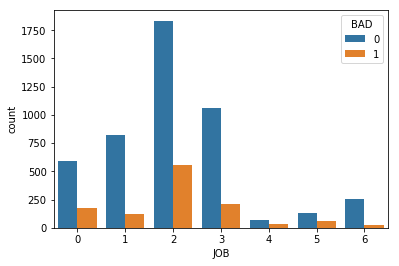

In [37]:
sns.countplot(x = 'JOB', hue='BAD', data = df)
#Весьма интересное наблюдение: хуже платят представители 1, 3 и 6 профессий.
#Попробуем из этого выделить новый признак, и заново построить модель

(array([ 496.,    5.,   20.,   78.,  236.,  491.,  768.,  995., 1259.,
         423.]),
 array([ 0.        ,  4.55698427,  9.11396853, 13.6709528 , 18.22793706,
        22.78492133, 27.34190559, 31.89888986, 36.45587412, 41.01285839,
        45.56984265]),
 <a list of 10 Patch objects>)

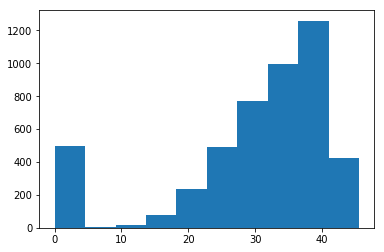

In [38]:
plt.hist(df[df['BAD'] == 0]['DEBTINC'])

(array([807., 228., 129.,  17.,   3.,   1.,   1.,   2.,   0.,   1.]),
 array([  0.        ,  20.33121487,  40.66242974,  60.99364461,
         81.32485948, 101.65607435, 121.98728921, 142.31850408,
        162.64971895, 182.98093382, 203.31214869]),
 <a list of 10 Patch objects>)

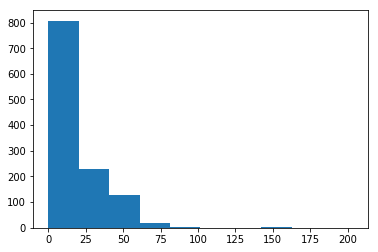

In [39]:
plt.hist(df[df['BAD'] == 1]['DEBTINC'])

In [70]:
X_full = pd.concat([X_train, X_test])
X_full['notgood_job'] = df['JOB'].map(lambda x: 1 if ((x == 1) or (x == 3) or (x == 6)) else 0)

In [71]:
X_full.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_0,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6,notgood_job
0,1100,25860.0,39025.0,1.0,10.5,0.0,0.0,94.366667,1.0,9.0,0.0,0,0,1,0,0,0,0,0
1,1300,70053.0,68400.0,1.0,7.0,0.0,2.0,121.833333,0.0,14.0,0.0,0,0,1,0,0,0,0,0
2,1500,13500.0,16700.0,1.0,4.0,0.0,0.0,149.466667,1.0,10.0,0.0,0,0,1,0,0,0,0,0
3,1500,65000.0,89200.0,0.0,7.0,0.0,0.0,179.000000,0.0,0.0,0.0,0,0,0,0,0,0,1,1
4,1700,97800.0,112000.0,1.0,3.0,0.0,0.0,93.333333,0.0,14.0,0.0,0,1,0,0,0,0,0,1


In [73]:
xgb = XGBClassifier(max_depth=6, n_estimators=750, n_jobs=-1, random_state=17)
scaler = StandardScaler()
X_train = X_full.iloc[:int(idx_split), :]
X_test = X_full.iloc[int(idx_split) :, :]
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xgb.fit(X_train_scaled, y_train)
print("Результат выбранной модели: %s" % roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:,1]))

Результат выбранной модели: 0.9052452964991664


Совсем незначительные улучшения, попробуем ещё.

In [74]:
#А теперь попробем добавить признак notgood_debtinc
X_full = pd.concat([X_train, X_test])

X_full['notgood_debtinc'] = df['DEBTINC'].map(lambda x: 1 if (((x > 45) and (x <= 100)) or 
                                                                 ((x > 140) and (x < 170))) else 0)

In [77]:
X_full.head()

,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_0,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6,notgood_job,notgood_debtinc
0,1100,25860.0,39025.0,1.0,10.5,0.0,0.0,94.366667,1.0,9.0,0.0,0,0,1,0,0,0,0,0,0
1,1300,70053.0,68400.0,1.0,7.0,0.0,2.0,121.833333,0.0,14.0,0.0,0,0,1,0,0,0,0,0,0
2,1500,13500.0,16700.0,1.0,4.0,0.0,0.0,149.466667,1.0,10.0,0.0,0,0,1,0,0,0,0,0,0
3,1500,65000.0,89200.0,0.0,7.0,0.0,0.0,179.000000,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0
4,1700,97800.0,112000.0,1.0,3.0,0.0,0.0,93.333333,0.0,14.0,0.0,0,1,0,0,0,0,0,1,0


In [76]:
xgb = XGBClassifier(max_depth=6, n_estimators=750, n_jobs=-1, random_state=17)
scaler = StandardScaler()
X_train = X_full.iloc[:int(idx_split), :]
X_test = X_full.iloc[int(idx_split):, :]
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xgb.fit(X_train_scaled, y_train)
print("Результат выбранной модели: %s" % roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:,1]))

Результат выбранной модели: 0.9052452964991664


In [45]:
#Никаких улучшений с этим признаком, удаляем. И заново обучим модель.
X_train.drop('notgood_debtinc', axis = 1, inplace=True)
X_test.drop('notgood_debtinc', axis = 1, inplace=True)
xgb = XGBClassifier(max_depth=6, n_estimators=750, n_jobs=-1, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=750,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

Построим кривые валидации и обучения.

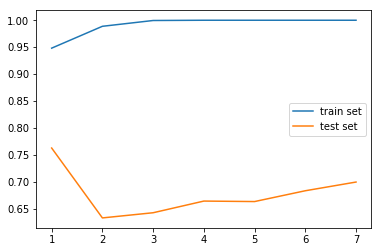

In [46]:
#Кривые валидации в зависимости от глубины 750 деревьев
train_scores, test_scores = validation_curve(XGBClassifier(n_estimators=750), X_train, y_train,'max_depth', range(1,8), cv = cv, scoring='roc_auc')
plt.plot(range(1,8), np.mean(train_scores, axis = 1), label = 'train set')
plt.plot(range(1,8), np.mean(test_scores, axis = 1), label = 'test set')
plt.legend()
plt.show()

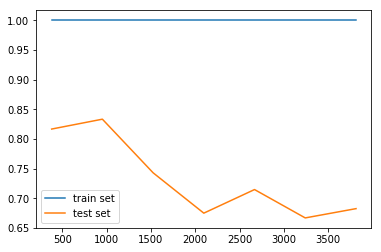

In [52]:
#Кривые обучения в зависимости от величины выборки
train_sizes, train_scores, test_scores = learning_curve(xgb, X_train, y_train, train_sizes = np.linspace(0.1, 1, 7), cv = cv, scoring = 'roc_auc')
plt.plot(train_sizes, np.mean(train_scores, axis = 1), label = 'train set')
plt.plot(train_sizes, np.mean(test_scores, axis = 1), label = 'test set')
plt.legend()
plt.show()

По обоим графикам можно свидетельствовать о нехватке данных. По validation curve заметно, что схоимость графиков может ещё наблюдаться с более сильным увеличением глубины деревьев. По learning curve результат модели на тренировочных данных быстро выходит на плато, а на тестовых заметен сильный спад и небольшой рост под конец. Безусловно, необходим больший размер выборки.

In [79]:
result = roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:, 1])
print('Результат модели %s' % result)

Результат модели 0.9052452964991664


В принципе, этот результат мы уже видели, когда создали для себя условный бейзлайн при генерации фичей. Если сравнивать его с резульаттом кросс валидации, то потеря качества не особо существенна, менее 1%.

## Выводы.

Не представляю, как раньше банки составляли скорринговые карты вручную, каким образом исследовали зависимости, определяли закономерности. Скорее всего,  основной инструмент, которым приходилось руководствоваться - это личные педубеждения. И, либо на службу нанимались действительно незаурядные личности, обладающие особенным чутьём, либо уже тогда банки уверенно полагались на коллекторов=). В любом случае, в современных условиях необходимо анализировать риски, чтобы корректно выстраивать сратегию развития и дальнейшего существования компании. Без сбора статистической информации это сделать невозможно, а без машинного обучения, её невозможно адекватно оценивать.
Применительно к построенной модели. Не смотря на то, что по кривым валидации и обучения был получен вывод о недостаточной величине обучаемой выборки, а так же о дальнейших возможностях усложнения выбранной модели, результат roc auc в более чем 90% на отложенной выбокре говорит о достаточно хорошем качестве уже сейчас. В качестве улучшения я бы порекомендовал собирать дополнительные признаки, вроде возраста заёмщика, семейного положения, количества детей в семье (вполне возможно, что семьи с детьми тщательнее планируют свой бюджет и в среднем имеют меньшее количество просрочек).